In [ ]:
import pandas as pd
import pandasql
import csv
import scipy
import scipy.stats
filename = "weather_underground.csv"
turnstile_weather = "turnstile_data_master_with_weather.csv"

In [2]:
# Quiz 2.1
def num_rainy_days(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  The SQL query should return one column and
    one row - a count of the number of days in the dataframe where
    the rain column is equal to 1 (i.e., the number of days it
    rained).  The dataframe will be titled 'weather_data'. You'll
    need to provide the SQL query.  You might find SQL's count function
    useful for this exercise.  You can read more about it here:
    
    https://dev.mysql.com/doc/refman/5.1/en/counting-rows.html
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    You can see the weather data that we are passing in below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/weather_underground.csv
    '''
    weather_data = pd.read_csv(filename)

    q = """
    SELECT count(*)
    FROM weather_data
    WHERE rain=1;
    """
    
    #Execute your SQL command against the pandas frame
    rainy_days = pandasql.sqldf(q.lower(), locals())
    return rainy_days
print num_rainy_days(filename)

   count(*)
0        10


In [4]:
#Quiz 2.2
def max_temp_aggregate_by_fog(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  The SQL query should return two columns and
    two rows - whether it was foggy or not (0 or 1) and the max
    maxtempi for that fog value (i.e., the maximum max temperature
    for both foggy and non-foggy days).  The dataframe will be 
    titled 'weather_data'. You'll need to provide the SQL query.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    You can see the weather data that we are passing in below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/weather_underground.csv
    '''
    weather_data = pandas.read_csv(filename)

    q = """
    SELECT  fog, MAX(maxtempi)
    FROM weather_data
    GROUP BY fog
    """
    
    #Execute your SQL command against the pandas frame
    foggy_days = pandasql.sqldf(q.lower(), locals())
    return foggy_days
print max_temp_aggregate_by_fog(filename)

   fog  max(maxtempi)
0    0             86
1    1             81


In [5]:
#Quiz 2.3
def avg_weekend_temperature(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data.  The SQL query should return one column and
    one row - the average meantempi on days that are a Saturday
    or Sunday (i.e., the the average mean temperature on weekends).
    The dataframe will be titled 'weather_data' and you can access
    the date in the dataframe via the 'date' column.
    
    You'll need to provide  the SQL query.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    Also, you can convert dates to days of the week via the 'strftime' keyword in SQL.
    For example, cast (strftime('%w', date) as integer) will return 0 if the date
    is a Sunday or 6 if the date is a Saturday.
    
    You can see the weather data that we are passing in below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/weather_underground.csv
    '''
    weather_data = pandas.read_csv(filename)

    q = """
    SELECT avg(meantempi)
    FROM weather_data
    WHERE cast (strftime('%w', date) as integer) = 0 or cast (strftime('%w', date) as integer) = 6;
    """
    
    #Execute your SQL command against the pandas frame
    mean_temp_weekends = pandasql.sqldf(q.lower(), locals())
    return mean_temp_weekends
print avg_weekend_temperature(filename)

   avg(meantempi)
0       65.111111


In [6]:
def avg_min_temperature(filename):
    '''
    This function should run a SQL query on a dataframe of
    weather data. More specifically you want to find the average
    minimum temperature (mintempi column of the weather dataframe) on 
    rainy days where the minimum temperature is greater than 55 degrees.
    
    You might also find that interpreting numbers as integers or floats may not
    work initially.  In order to get around this issue, it may be useful to cast
    these numbers as integers.  This can be done by writing cast(column as integer).
    So for example, if we wanted to cast the maxtempi column as an integer, we would actually
    write something like where cast(maxtempi as integer) = 76, as opposed to simply 
    where maxtempi = 76.
    
    You can see the weather data that we are passing in below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/weather_underground.csv
    '''
    weather_data = pandas.read_csv(filename)

    q = """
    SELECT avg(mintempi)
    FROM weather_data
    WHERE mintempi > 55 and rain = 1;
    """
    
    #Execute your SQL command against the pandas frame
    avg_min_temp_rainy = pandasql.sqldf(q.lower(), locals())
    return avg_min_temp_rainy
avg_min_temperature(filename)

,avg(mintempi)
0,61.25


In [7]:
filenames = ["turnstile_110507.csv"]
import csv

def fix_turnstile_data(filenames):
    '''
    Filenames is a list of MTA Subway turnstile text files. A link to an example
    MTA Subway turnstile text file can be seen at the URL below:
    http://web.mta.info/developers/data/nyct/turnstile/turnstile_110507.txt
    
    As you can see, there are numerous data points included in each row of the
    a MTA Subway turnstile text file. 

    You want to write a function that will update each row in the text
    file so there is only one entry per row. A few examples below:
    A002,R051,02-00-00,05-28-11,00:00:00,REGULAR,003178521,001100739
    A002,R051,02-00-00,05-28-11,04:00:00,REGULAR,003178541,001100746
    A002,R051,02-00-00,05-28-11,08:00:00,REGULAR,003178559,001100775
    
    Write the updates to a different text file in the format of "updated_" + filename.
    For example:
        1) if you read in a text file called "turnstile_110521.txt"
        2) you should write the updated data to "updated_turnstile_110521.txt"

    The order of the fields should be preserved. Remember to read through the 
    Instructor Notes below for more details on the task. 
    
    In addition, here is a CSV reader/writer introductory tutorial:
    http://goo.gl/HBbvyy
    
    You can see a sample of the turnstile text file that's passed into this function
    and the the corresponding updated file in the links below:
    
    Sample input file:
    https://www.dropbox.com/s/mpin5zv4hgrx244/turnstile_110528.txt
    Sample updated file:
    https://www.dropbox.com/s/074xbgio4c39b7h/solution_turnstile_110528.txt
    '''
    for name in filenames:
        #create file input object f_in to work with filenames  
        file_in = open(name, 'r')
        file_out = open('updated_' + name, 'w')
        #create csv reader and writer based on file object
        reader_in = csv.reader(file_in, delimiter = ',')
        writer_out = csv.writer(file_out, delimiter = ',')
        for line in reader_in:
            header = line[:3]
            for i in range(3, len(line), 5):
                writer_out.writerow(header + line[i:i+5])
                
fix_turnstile_data(filenames)

In [8]:
def create_master_turnstile_file(filenames, output_file):
    '''
    Write a function that takes the files in the list filenames, which all have the 
    columns 'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn', and consolidates
    them into one file located at output_file.  There should be ONE row with the column
    headers, located at the top of the file. The input files do not have column header
    rows of their own.
    
    For example, if file_1 has:
    line 1 ...
    line 2 ...
    
    and another file, file_2 has:
    line 3 ...
    line 4 ...
    line 5 ...
    
    We need to combine file_1 and file_2 into a master_file like below:
     'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
    line 1 ...
    line 2 ...
    line 3 ...
    line 4 ...
    line 5 ...
    '''
    filenames = "updated_turnstile_110507.csv"
    with open("turnstile_data_master_with_weather.csv", 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in filenames:
            # your code here
            master_file.write(''.join(open(filenames).readlines()))
        master_file.close()  
        
create_master_turnstile_file(filenames, "turnstile_data_master_with_weather.csv")


In [9]:
import pandas

def filter_by_regular(filename):
    '''
    This function should read the csv file located at filename into a pandas dataframe,
    and filter the dataframe to only rows where the 'DESCn' column has the value 'REGULAR'.
    
    For example, if the pandas dataframe is as follows:
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231
    
    The dataframe will look like below after filtering to only rows where DESCn column
    has the value 'REGULAR':
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    '''
    turnstile_data = pandas.read_csv("turnstile_data_master_with_weather.csv")
    turnstile_data = turnstile_data[turnstile_data.DESCn == 'REGULAR']  
    return turnstile_data
print filter_by_regular(filename)

           C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn   EXITSn
0         A002  R051  02-00-00  04-30-11  00:00:00  REGULAR   3143506  1087907
1         A002  R051  02-00-00  04-30-11  04:00:00  REGULAR   3143547  1087915
2         A002  R051  02-00-00  04-30-11  08:00:00  REGULAR   3143563  1087935
3         A002  R051  02-00-00  04-30-11  12:00:00  REGULAR   3143646  1088024
4         A002  R051  02-00-00  04-30-11  16:00:00  REGULAR   3143865  1088083
5         A002  R051  02-00-00  04-30-11  20:00:00  REGULAR   3144181  1088132
6         A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312  1088151
7         A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335  1088159
8         A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353  1088177
9         A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424  1088231
10        A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594  1088275
11        A002  R051  02-00-00  05-01-11  20:00:00  

In [10]:

def get_hourly_entries(df):
    '''
    The data in the MTA Subway Turnstile data reports on the cumulative
    number of entries and exits per row.  Assume that you have a dataframe
    called df that contains only the rows for a particular turnstile machine
    (i.e., unique SCP, C/A, and UNIT).  This function should change
    these cumulative entry numbers to a count of entries since the last reading
    (i.e., entries since the last row in the dataframe).
    
    More specifically, you want to do two things:
       1) Create a new column called ENTRIESn_hourly
       2) Assign to the column the difference between ENTRIESn of the current row 
          and the previous row. If there is any NaN, fill/replace it with 1.
    
    You may find the pandas functions shift() and fillna() to be helpful in this exercise.
    
    Examples of what your dataframe should look like at the end of this exercise:
    
           C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243
    ...
    ...

    '''
    df = pandas.read_csv("turnstile_data_master_with_weather.csv")
    df['ENTRIESn_hourly'] = df['ENTRIESn'] - df['ENTRIESn'].shift(periods=1)  
    df['ENTRIESn_hourly'] = df['ENTRIESn_hourly'].fillna(1)
    return df
print get_hourly_entries("turnstile_data_master_with_weather.csv")

           C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn  \
0         A002  R051  02-00-00  04-30-11  00:00:00  REGULAR   3143506   
1         A002  R051  02-00-00  04-30-11  04:00:00  REGULAR   3143547   
2         A002  R051  02-00-00  04-30-11  08:00:00  REGULAR   3143563   
3         A002  R051  02-00-00  04-30-11  12:00:00  REGULAR   3143646   
4         A002  R051  02-00-00  04-30-11  16:00:00  REGULAR   3143865   
5         A002  R051  02-00-00  04-30-11  20:00:00  REGULAR   3144181   
6         A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   
7         A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   
8         A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   
9         A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   
10        A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   
11        A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   
12        A002  R051  02-00-00  05-02-11  00:00:00 

In [11]:

def get_hourly_exits(df):
    '''
    The data in the MTA Subway Turnstile data reports on the cumulative
    number of entries and exits per row.  Assume that you have a dataframe
    called df that contains only the rows for a particular turnstile machine
    (i.e., unique SCP, C/A, and UNIT).  This function should change
    these cumulative exit numbers to a count of exits since the last reading
    (i.e., exits since the last row in the dataframe).
    
    More specifically, you want to do two things:
       1) Create a new column called EXITSn_hourly
       2) Assign to the column the difference between EXITSn of the current row 
          and the previous row. If there is any NaN, fill/replace it with 0.
    
    You may find the pandas functions shift() and fillna() to be helpful in this exercise.
    
    Example dataframe below:

          Unnamed: 0   C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly  EXITSn_hourly
    0              0  A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                0              0
    1              1  A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23              8
    2              2  A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18             18
    3              3  A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71             54
    4              4  A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170             44
    5              5  A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214             42
    6              6  A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87             11
    7              7  A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10              3
    8              8  A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36             89
    9              9  A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153            333
    '''
    
    df['EXITSn_hourly'] = df['EXITSn'] - df['EXITSn'].shift(periods=1)
    df['EXITSn_hourly'] = df['EXITSn_hourly'].fillna(0)
    return df


In [12]:
df = pandas.read_csv("turnstile_data_master_with_weather.csv")
time = df['TIMEn'][20]

def time_to_hour(time):
    '''
    Given an input variable time that represents time in the format of:
    "00:00:00" (hour:minutes:seconds)
    
    Write a function to extract the hour part from the input variable time
    and return it as an integer. For example:
        1) if hour is 00, your code should return 0
        2) if hour is 01, your code should return 1
        3) if hour is 21, your code should return 21
        
    Please return hour as an integer.
    '''
    
    hour = int(time.split(':')[0])
    return hour
print time_to_hour(time)

8


In [13]:
from datetime import datetime
import time

date = df['DATEn'][0]
print date

def reformat_subway_dates(date):
    '''
    keep the format of dates in standardised manner
    '''
    date_formatted = datetime.strptime(date, '%m-%d-%y').strftime('%y-%m-%d')
    return date_formatted
print reformat_subway_dates(date)

04-30-11
11-04-30


<module 'matplotlib.pyplot' from 'C:\Users\Shantanu\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>


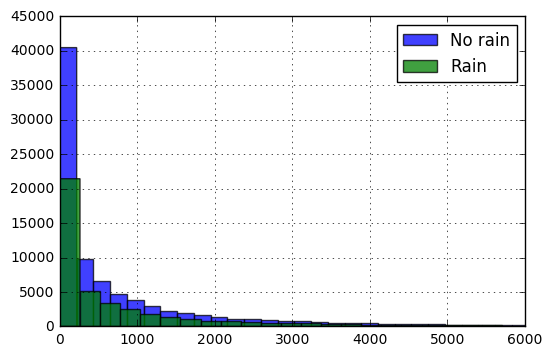

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    Your histogram may look similar to bar graph in the instructor notes below.
    
    You can read a bit about using matplotlib and pandas to plot histograms here:
    http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
    You can see the information contained within the turnstile weather data here:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
    '''
    turnstile_weather = pandas.read_csv("turnstile_data_master_with_weather.csv")
    plt.figure()
    turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 0].hist(bins=200, alpha=0.75, label="No rain")
    turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 1].hist(bins=200, alpha=0.75,label="Rain")
    plt.axis([0, 6000, 0, 45000])
    plt.legend()
    return plt
print entries_histogram(turnstile_weather)

In [15]:
import numpy as np
import scipy
import scipy.stats


def mann_whitney_plus_means(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation, and you 
    might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
    '''
    
    ### YOUR CODE HERE ###
    turnstile_weather = pandas.read_csv("turnstile_data_master_with_weather.csv")
    with_rain = turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 1]
    without_rain = turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain'] == 0]
    with_rain_mean = with_rain.mean()
    without_rain_mean = without_rain.mean()

    U, p = scipy.stats.mannwhitneyu(with_rain, without_rain)

    return with_rain_mean, without_rain_mean, U, p*2 # leave this line for the grader
mann_whitney_plus_means(turnstile_weather)

(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.049880784588986711)

    Hour    Unnamed: 0  ENTRIESn_hourly  EXITSn_hourly  maxpressurei  \
0      0  65038.742545      1167.690147    1028.844533     30.030856   
1      1  66046.961398       605.048709     562.032270     30.032858   
2      2  67785.901869       181.874257     116.321155     30.037341   
3      3  67554.742366        38.810592      34.455630     30.026512   
4      4  65316.875538       262.313576     274.990964     30.029722   
5      5  66075.097897       142.587866     135.852188     30.033018   
6      6  66569.663563        77.356750      50.958950     30.038087   
7      7  67137.880961       146.389928     111.271652     30.029252   
8      8  65464.693552       683.933781     457.272965     30.030360   
9      9  65642.297272      1315.495175     819.117955     30.032221   
10    10  67531.285655       545.392620     559.752902     30.039838   
11    11  67630.735174       292.568130     358.255319     30.030005   
12    12  65369.670431      2453.842100    2013.745724     30.02

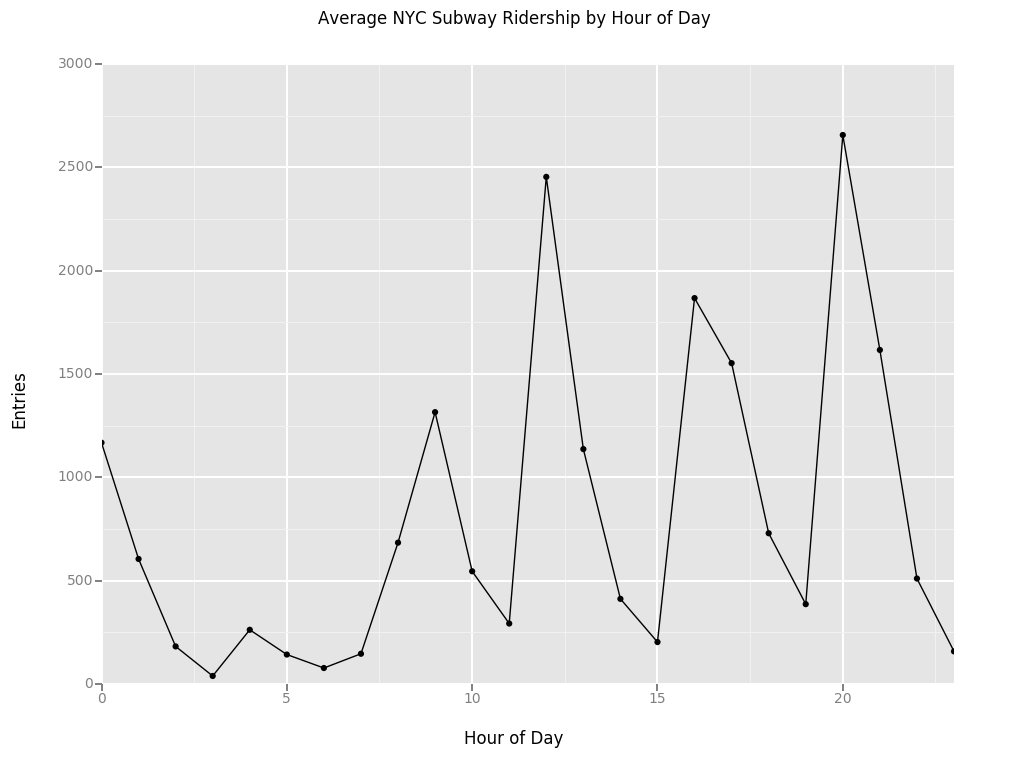

<ggplot: (15855280)>

In [10]:
from pandas import *
from ggplot import *
from numpy import mean
import pandasql
def plot_weather_data(turnstile_weather):
    '''
    You are passed in a dataframe called turnstile_weather. 
    Use turnstile_weather along with ggplot to make a data visualization
    focused on the MTA and weather data we used in assignment #3.  
    You should feel free to implement something that we discussed in class 
    (e.g., scatterplots, line plots, or histograms) or attempt to implement
    something more advanced if you'd like.  

    Here are some suggestions for things to investigate and illustrate:
     * Ridership by time of day or day of week
     * How ridership varies based on Subway station (UNIT)
     * Which stations have more exits or entries at different times of day
       (You can use UNIT as a proxy for subway station.)

    If you'd like to learn more about ggplot and its capabilities, take
    a look at the documentation at:
    https://pypi.python.org/pypi/ggplot/
     
    You can check out:
    https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv
     
    To see all the columns and data points included in the turnstile_weather 
    dataframe. 
     
    However, due to the limitation of our Amazon EC2 server, we are giving you a random
    subset, about 1/3 of the actual data in the turnstile_weather dataframe.
    '''
    turnstile_weather = pandas.read_csv("turnstile_data_master_with_weather.csv")
    mean_hour_ridership = turnstile_weather.groupby(['Hour'], as_index=False).aggregate(mean)
    print mean_hour_ridership
    plot = ggplot(mean_hour_ridership, aes(x='Hour', y='ENTRIESn_hourly')) +\
           geom_line(colour='blue') + geom_point(colour = 'red') + scale_x_continuous(limits=[0,23]) +\
            scale_y_continuous(limits=[0,3000]) +\
           ggtitle('Average NYC Subway Ridership by Hour of Day') + xlab('Hour of Day') + ylab('Entries')
    return plot
plot_weather_data(turnstile_weather)